In [1]:
import platform
print(platform.python_version())

3.12.4


In [2]:
!pip install -q --upgrade pip pandas keras tensorflow matplotlib numpy setuptools scikit-learn seaborn imblearn


In [3]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

np.random.seed(2)

In [4]:
data = pd.read_csv('creditcard.csv')

## Data exploration

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(data)

284807

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Defining some useful functions that will be used

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

skf = StratifiedKFold(n_splits = 5)
results_cv = []

In [11]:
def plot_class_distribution(df, class_column, title="Class Distribution", figsize=(6, 4), palette='Set2', count_offset=500):
    class_counts = df[class_column].value_counts()
    sns.barplot(x=class_counts.index, y=class_counts.values, palette=palette)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    for i, value in enumerate(class_counts.values):
        plt.text(i, value + count_offset, str(value), ha='center', va='bottom', fontsize=12)
    plt.figure(figsize=figsize)
    plt.show()



In [12]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [13]:
# will keep track of the results of each model
columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score']
results_testset = pd.DataFrame(columns=columns)


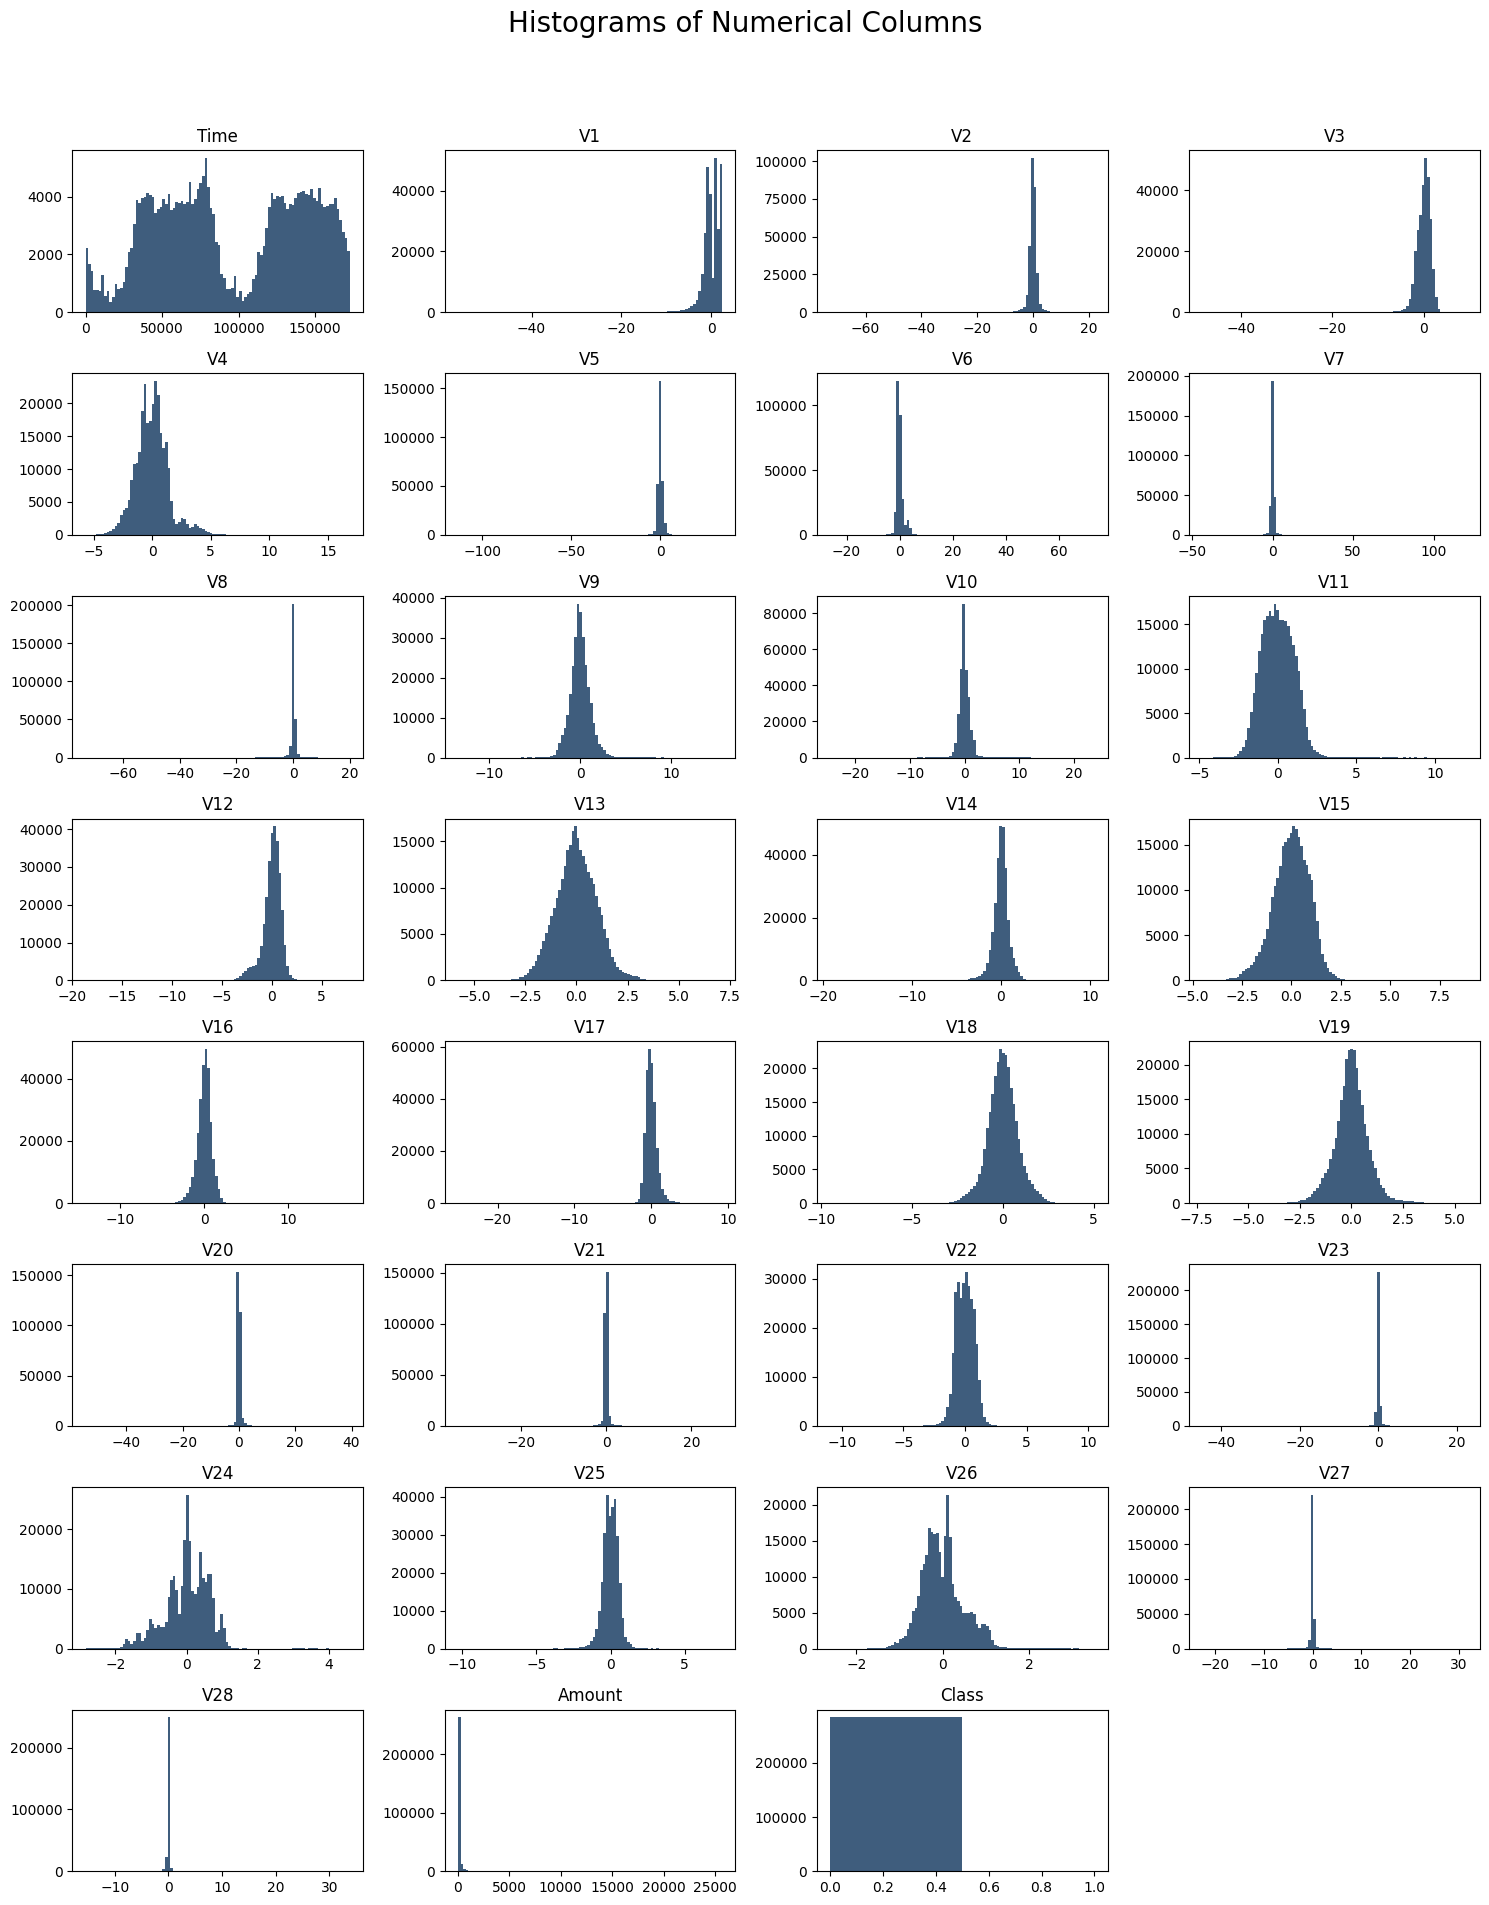

In [14]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

- we can observe a large prevalence of Class 0 (non fraudulent).

In [16]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


C:\Users\amine\AppData\Local\Temp\ipykernel_24992\3199011943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=palette)


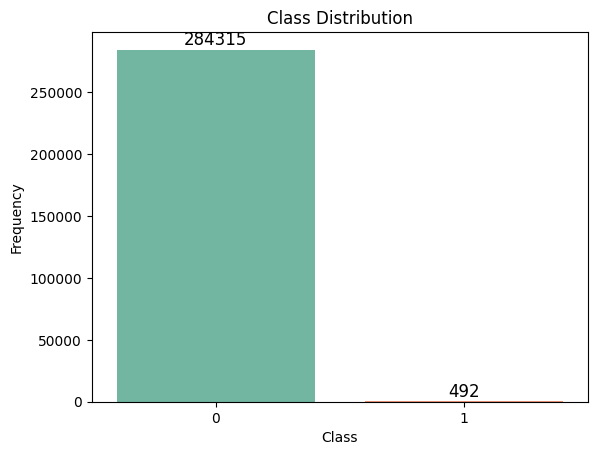

<Figure size 600x400 with 0 Axes>

In [17]:
plot_class_distribution(data, 'Class')

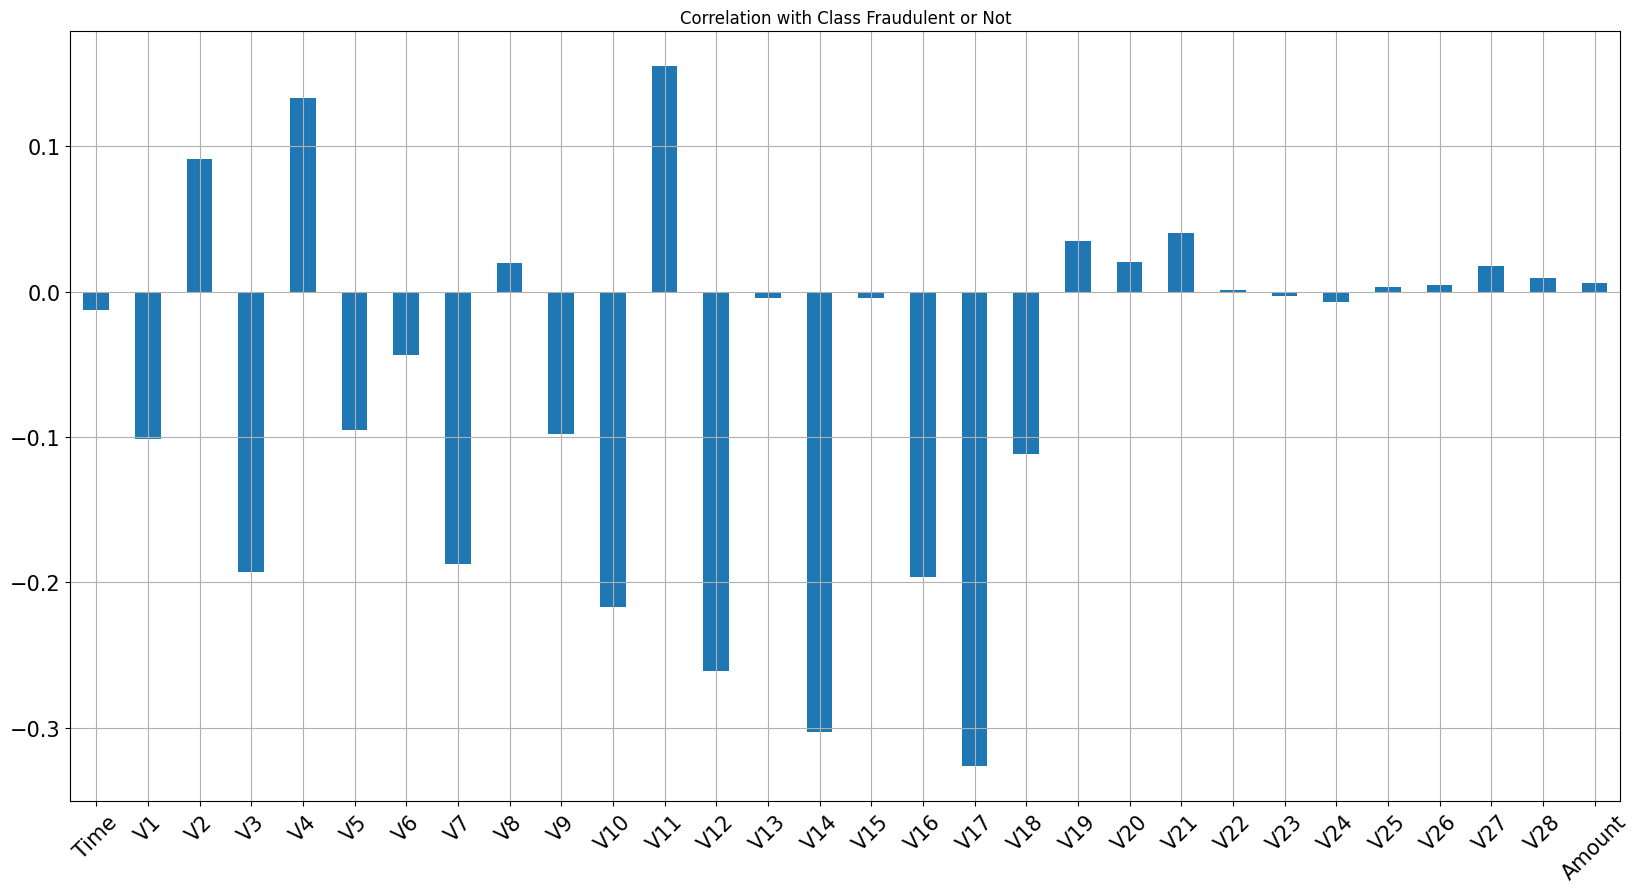

In [18]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

## Pre-processing

In [20]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
# Split the data into training and test sets first (before normalization)
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_cv = X_train.copy() #create copy to use for cross validation to avoid data leakage in cv by applying processing later
y_train_cv = y_train.copy()

In [23]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [25]:

X_train['normalizedAmount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))

# Transform the test data using the same scaler (do not fit again)
X_test['normalizedAmount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

# Drop the original 'Amount' column from both training and test sets
X_train = X_train.drop(['Amount'], axis=1)
X_test = X_test.drop(['Amount'], axis=1)


In [26]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [27]:
X_train.shape

(199364, 29)

In [28]:
X_test.shape

(85443, 29)

---

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('normalize_amount', StandardScaler(), ['Amount']) 
    ],
    remainder='passthrough' 
)


# Construct the pipeline: preprocessing + classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Perform cross-validation and display results
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv.values.ravel(), cv=skf)
results_cv.append({
    "Model": "Random Forest",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})


In [34]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [35]:
y_pred = random_forest.predict(X_test)

In [36]:
random_forest.score(X_test,y_test)

0.9995201479348805

Confusion matrix, without normalization
[[85290     6]
 [   35   112]]


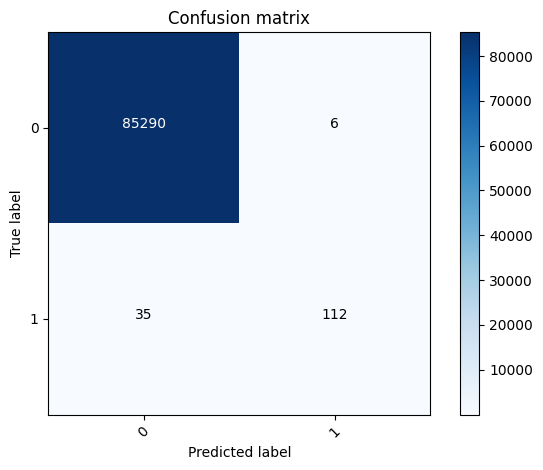

In [37]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [38]:
print(results_cv)

[{'Model': 'Random Forest', 'Mean Accuracy': 0.9995385324579296, 'Std Deviation': 3.7536708382853896e-05, 'CV Scores': [0.999, 1.0, 1.0, 1.0, 1.0]}]


- while only 6 regular transactions are wrongly predicted as fraudulent, the model only detects 78% of the fraudulent transactions. As a consequence 33 fraudulent transactions are not detected (False Negatives).
- Let's see if we can improve this performance with other machine learning / deep learning models in the rest of the notebook.

In [40]:
# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print('accuracy:%0.4f' % acc, '\tprecision:%0.4f' % prec, '\trecall:%0.4f' % rec, '\tF1-score:%0.4f' % f1)

accuracy:0.9995 	precision:0.9492 	recall:0.7619 	F1-score:0.8453


Let's store each model's performance in a dataframe for comparison purpose

In [42]:
# ### Store results in dataframe for comparing various Models
model_result = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

C:\Users\amine\AppData\Local\Temp\ipykernel_24992\3239135241.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_testset = pd.concat([results_testset, model_result], ignore_index=True)


In [43]:
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.99952,0.238095,0.761905,0.949153,0.845283


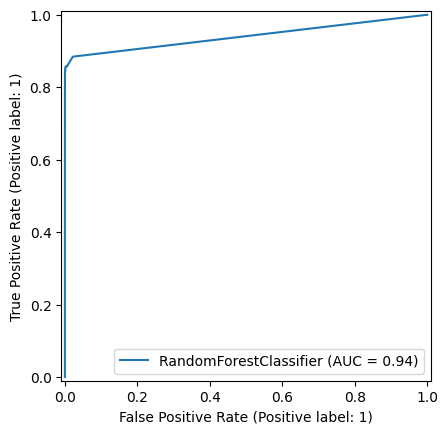

In [44]:

# Plot ROC curve
ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

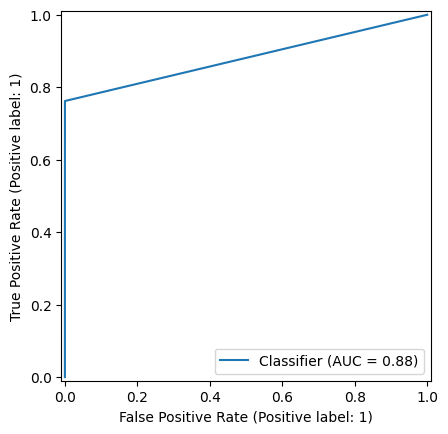

In [45]:
RocCurveDisplay.from_predictions(y_test, y_pred)


We will run the models on the full dataset to check.

---

## Decision trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [50]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

In [51]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv.values.ravel(), cv=skf)
results_cv.append({
    "Model": "Decision trees",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

In [52]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [53]:
y_pred = decision_tree.predict(X_test)

In [54]:
decision_tree.score(X_test,y_test)

0.9993094811745842

Confusion matrix, without normalization
[[85272    24]
 [   35   112]]


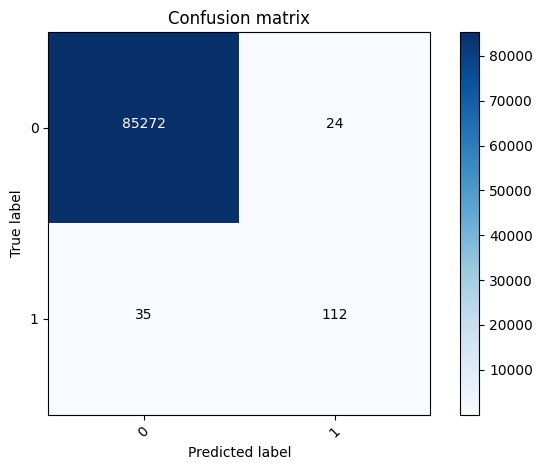

In [55]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

- The performance of the Decision Tree model is below the one using Random Forest. Let's check the performance indicators.

In [57]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [58]:
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

In [59]:
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519


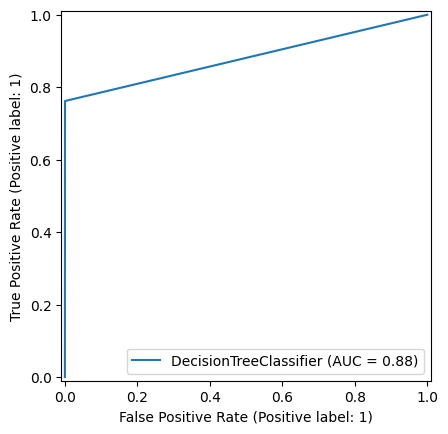

In [60]:
ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.show()

---
---

## Let's now explore Neural Network models

In [63]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network
- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).
- a dropout step is included to prevent overfitting.

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [66]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

C:\Users\amine\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training

In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [70]:
nn_classifier =  KerasClassifier(model=model, epochs=5, batch_size=15)

In [71]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', nn_classifier)
])

In [72]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv, cv=skf)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
results_cv.append({
    "Model": "Neural Network",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9974 - loss: 0.0269
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9994 - loss: 0.0028
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 660us/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9980 - loss: 0.0258
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9993 - loss: 0.0047
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0035
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9995 - loss: 0.0029
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9995 - loss: 0.0028
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 684us/step


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9979 - loss: 0.0281
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9992 - loss: 0.0043
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9992 - loss: 0.0031
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9993 - loss: 0.0036
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9994 - loss: 0.0030
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 678us/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9979 - loss: 0.0270
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9994 - loss: 0.0038
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9994 - loss: 0.0028
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 700us/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9980 - loss: 0.0285
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9993 - loss: 0.0037
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9994 - loss: 0.0034
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9994 - loss: 0.0035
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step
Cross-validation scores: [0.99917237 0.99944825 0.99937301 0.99939809 0.99949839]
Mean cross-validation score: 0.9993780227140915


In [73]:
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9982 - loss: 0.0175
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9992 - loss: 0.0039
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9994 - loss: 0.0037
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9994 - loss: 0.0031
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9993 - loss: 0.0035


In [74]:
score = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9993 - loss: 0.0035


In [75]:
print(score)

[0.0036253153812140226, 0.9994031190872192]


- The model achieves an accuracy of 99.94% ! Is this a good performance ?
- Remember that our dataset is significantly composed of non fraudulent samples with only 172 fraudulent transactions per 100,000. Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.83% accuracy despite being unable to detect a single fraudulent case !

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step
Test Data Accuracy: 0.9994


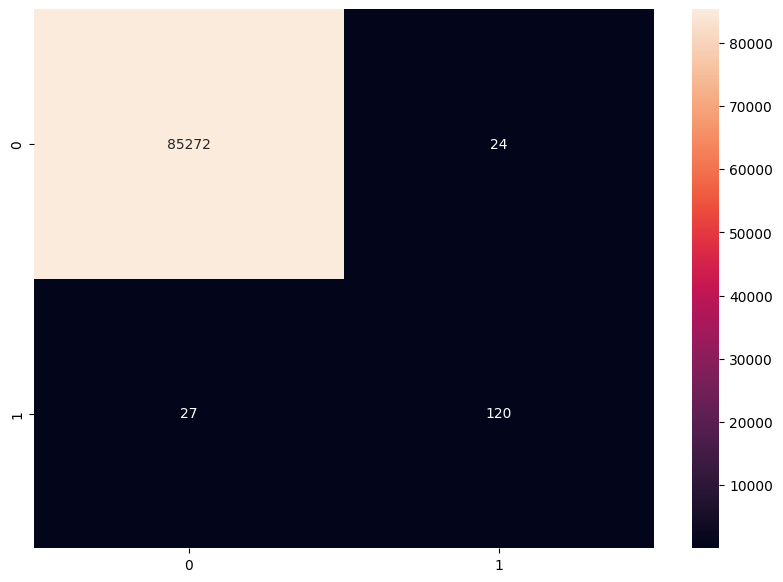

In [77]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

Detection of fraudulent transactions did not improve compared to the previous machine learning models.
- 115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.
- 21 regular transactions are detected as potentially fraudulent by the model. These are false positive. This number is negligible.

Conclusion : We must find ways to further reduce the number of false negative.

In [79]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)    # Pandas format required by confusion_matrix function

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 665us/step


In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test

In [81]:
print(cnf_matrix)

[[85272    24]
 [   27   120]]


Confusion matrix, without normalization
[[85272    24]
 [   27   120]]


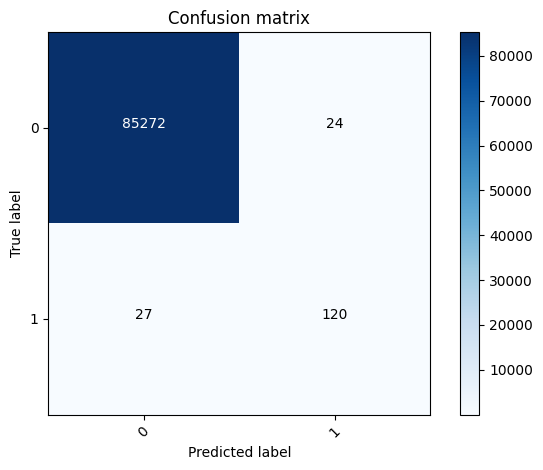

In [82]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [83]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [84]:
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742


---

### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection. Let's review the process:

In [87]:
from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train[i][0] for i in range(len(y_train))]))
# class_weights = dict(enumerate(class_weights))
# class_weights
flat_y_train = np.ravel(y_train)

# Compute class weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train), 
    y=flat_y_train
)
# Convert to dictionary format
class_weights_dict = dict(zip(np.unique(y_train), class_weights_array))
class_weights_dict


{0: 0.500866751415694, 1: 288.93333333333334}

- The class 'Fraudulent' (y=1) is assigned a weight of 289 vs 0.5 for the class 'not fraudulent' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on fraudulent cases during training.

In [89]:
fit_params = {'classifier__class_weight': class_weights_dict}

In [90]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv, cv=skf,params=fit_params)
results_cv.append({
    "Model": "Weighted Neural Network",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.7624 - loss: 4.4566
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9501 - loss: 0.3902
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9490 - loss: 0.3592
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9292 - loss: 0.4255
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9689 - loss: 0.3188
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step
Epoch 1/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.6869 - loss: 8.1688
Epoch 2/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9627 - loss: 0.3436
Epoch 3/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9778 - loss: 0.8836
Epoch 4/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9532 - loss: 0.4279
Epoch 5/5
10633/10633 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9311 - loss: 0.2858
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 681us/step
Epoch 1/5


In [91]:
model.fit(X_train, y_train, batch_size=15, epochs=5, class_weight=class_weights_dict, shuffle=True)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9941 - loss: 0.2745
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9938 - loss: 0.1625
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9861 - loss: 0.2045
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9813 - loss: 0.1423
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9789 - loss: 0.3025


In [92]:
score_weighted = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9890 - loss: 0.0274


In [93]:
print(score_weighted)

[0.028281575068831444, 0.9890570044517517]


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 714us/step
Test Data Accuracy: 0.9891


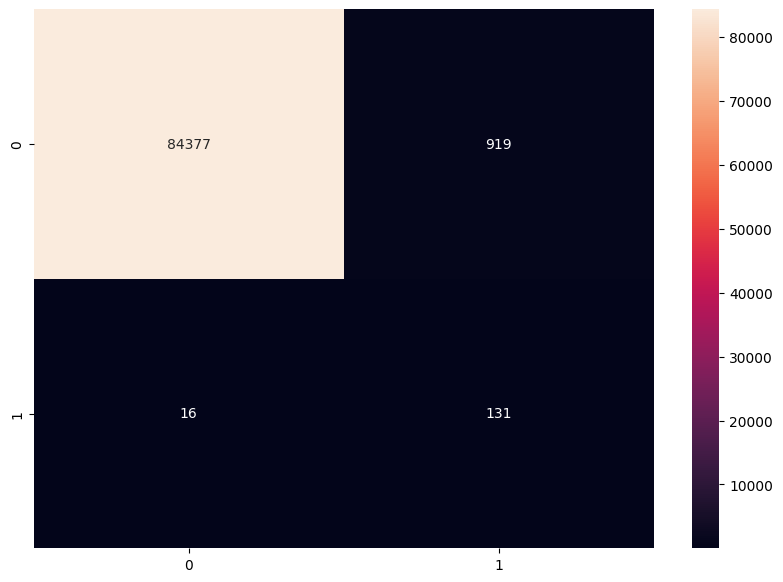

In [94]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

- The accuracy reduced a bit. We need to look at more detailed evaluation measures like precision and recall to gauge the true model performance.
- The model is actually much better at detecting fraudulent cases now. We have a lower False negative rate which is the key criteria for our purpose (detect a fraud when there is one).
- But on the other hand, the model generates an excessive number of false positive compared to the previous approaches. 

In [96]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [97]:
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881


- Although the recall metric improves, the F1-score collapses due to extremely poor precision. Given the very high number of transactions processed, the excessive number of false positives is clearly an issue.

---

## Undersampling
- In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.

In [101]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay


In [102]:
fraud_indices = np.array(y[y.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [103]:
normal_indices = data[data.Class == 0].index

In [104]:
len(normal_indices)

284315

In [105]:
# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [106]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [107]:
X_under_sample = X.iloc[under_sample_indices,:]
y_under_sample = y.iloc[under_sample_indices,:]

In [108]:
# # X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
# # y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']
# X_under_sample = X.copy()
# y_under_sample = y.copy()

In [109]:
X_train_under_sampled, X_test_under_sampled, y_train_under_sampled, y_test_under_sampled = train_test_split(X_under_sample,y_under_sample, test_size=0.3)
X_train_under_sampled_cv=X_train_under_sampled.copy() # copy the undersampled training data to use for cross validation
y_train_under_sampled_cv = y_train_under_sampled.copy()

In [110]:
X_train_under_sampled['normalizedAmount'] = scaler.fit_transform(X_train_under_sampled['Amount'].values.reshape(-1, 1))
X_test_under_sampled['normalizedAmount'] = scaler.fit_transform(X_test_under_sampled['Amount'].values.reshape(-1, 1))

X_train_under_sampled = X_train_under_sampled.drop(['Amount'], axis=1)
X_test_under_sampled = X_test_under_sampled.drop(['Amount'], axis=1)

print(X_test_under_sampled.shape)
print(X_train_under_sampled.shape)

(296, 29)
(688, 29)


In [111]:
X_train_under_sampled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
36583,1.322759,-1.401794,0.394167,-1.616558,-1.226775,0.496622,-1.312554,0.146012,-1.892357,1.501739,...,-0.123157,0.017134,0.319557,-0.159976,-0.797880,0.337608,-0.049563,0.052541,0.019775,-0.050795
27362,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,0.644550,...,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,-0.384114
178208,-5.904921,4.439911,-8.631802,7.788684,-4.989580,-1.200144,-7.674060,4.125761,-5.315778,-4.891156,...,-0.505608,1.775030,1.266441,-0.199410,0.014960,-0.000019,0.544210,-1.167566,-1.206354,-0.216502
221041,-1.172183,1.661713,-3.049637,2.555058,3.669035,-3.162998,-5.985640,-2.179935,-1.120292,-3.075558,...,0.548106,-0.812098,-0.295361,-5.988806,0.714381,-1.600024,-0.634783,0.822713,0.494375,-0.382285
154770,2.005548,0.141567,-1.526931,1.418005,0.513562,-0.598562,0.273091,-0.210296,1.553616,0.100914,...,-0.436010,-0.125622,-0.013799,0.011589,-0.507628,0.327454,-0.565362,-0.053606,-0.083540,-0.357061


In [112]:
print(X_train_under_sampled.shape)
print(X_test_under_sampled.shape)

(688, 29)
(296, 29)


C:\Users\amine\AppData\Local\Temp\ipykernel_24992\3199011943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=palette)


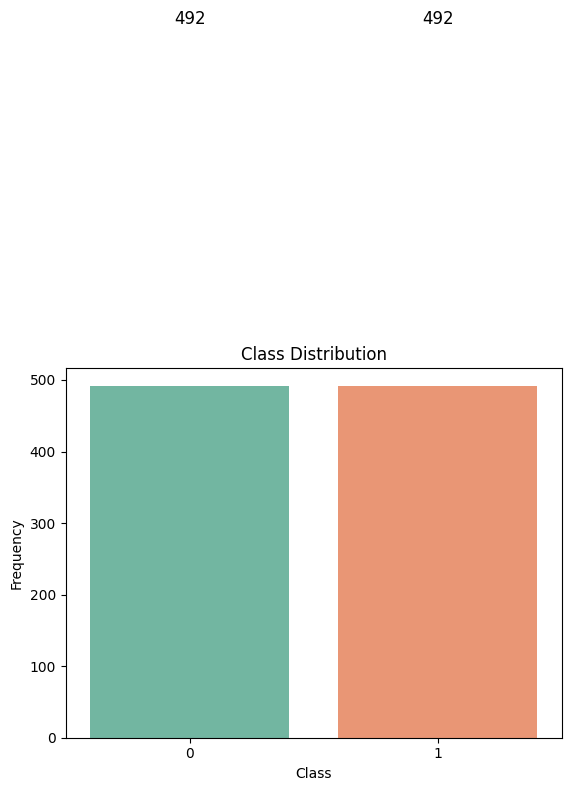

<Figure size 0x0 with 0 Axes>

In [113]:
plot_class_distribution(y_under_sample, 'Class',figsize=(0, 0))


In [114]:
X_train_under_sampled = np.array(X_train_under_sampled)
X_test_under_sampled = np.array(X_test_under_sampled)
y_train_under_sampled = np.array(y_train_under_sampled)
y_test_under_sampled = np.array(y_test_under_sampled)

In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,341 (24.77 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,228 (16.52 KB)

In [116]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [117]:
cv_scores = cross_val_score(pipeline, X_train_under_sampled_cv, y_train_under_sampled_cv, cv=skf)
results_cv.append({
    "Model": "Undersampled Neural Network",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]   # Store individual scores for reference
})

Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4467 - loss: 98.3712 
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5109 - loss: 8.4046
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4252 - loss: 7.2507
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4501 - loss: 7.0937
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4478 - loss: 5.3326
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4231 - loss: 90.0333
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 9.1660
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4259 - loss: 7.9017
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4654 - loss: 5.7583
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4590 - loss: 4.7892
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4257 - loss: 90.8263 
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5170 - loss: 9.0701
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4825 - loss: 6.5136 
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5214 - loss: 4.9729
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4658 - loss: 5.3437
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4251 - loss: 110.3415
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5035 - loss: 11.6654
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4584 - loss: 6.1891
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 6.2450
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4359 - loss: 5.4871
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Epoch 1/5


C:\Users\amine\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4388 - loss: 117.8543
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4799 - loss: 10.8544
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4767 - loss: 6.8510
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4847 - loss: 6.0766
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4332 - loss: 5.4842
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [118]:

model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9982 - loss: 0.0081
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9992 - loss: 0.0040
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9994 - loss: 0.0039
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9994 - loss: 0.0028


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion matrix, without normalization
[[144   0]
 [ 29 123]]


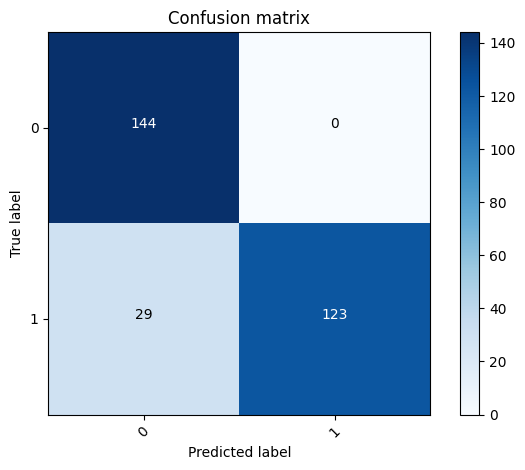

In [119]:
y_pred_under_sampled = model.predict(X_test_under_sampled)
y_expected_under_sampled = pd.DataFrame(y_test_under_sampled)
cnf_matrix = confusion_matrix(y_expected_under_sampled, y_pred_under_sampled.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- The metrics look pretty strong on the test set....

In [121]:
acc = accuracy_score(y_test_under_sampled, y_pred_under_sampled.round())
prec = precision_score(y_test_under_sampled, y_pred_under_sampled.round())
rec = recall_score(y_test_under_sampled, y_pred_under_sampled.round())
f1 = f1_score(y_test_under_sampled, y_pred_under_sampled.round())

In [122]:
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['UnderSampledNN (UnderSampled test data)', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545


....But the model fails on non fraudulent transactions as shown.

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 648us/step
Confusion matrix, without normalization
[[85274    22]
 [   30   117]]


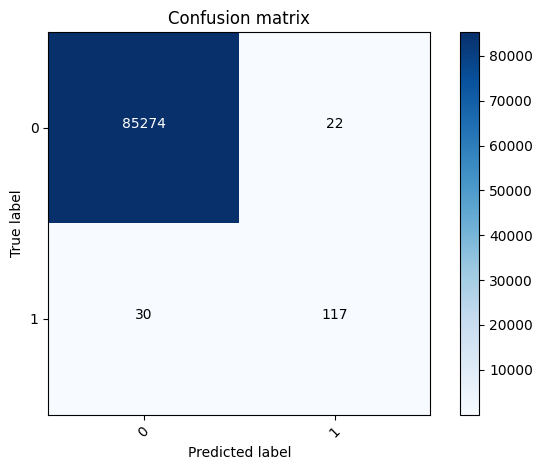

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545
5,UnderSampledNN (Normal testing data),0.999391,0.204082,0.795918,0.841727,0.818182


In [124]:
# Confusion matrix on the original test dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['UnderSampledNN (Normal testing data)', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

---

## Oversampling technique using SMOTE
(Synthetic Minority Oversample TEchnique)
- the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
- This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
smote = SMOTE()
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
X_test_resample, y_test_resample = smote.fit_resample(X_test, y_test)


In [137]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_train_resample)+len(y_test_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_test_resample[y_test_resample==1]) + np.sum(y_train_resample[y_train_resample==1]))

Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  568630
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  0    284315.0
dtype: float64


C:\Users\amine\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [151]:
X_train_resample = pd.DataFrame(X_train_resample)
X_test_resample = pd.DataFrame(X_test_resample)
y_train_resample = pd.DataFrame(y_train_resample)
y_test_resample = pd.DataFrame(y_test_resample)
y_resample= pd.DataFrame(np.concatenate([y_train_resample,y_test_resample]))

In [167]:
y_resample.rename(columns={0: 'Class'}, inplace=True)

C:\Users\amine\AppData\Local\Temp\ipykernel_24992\3199011943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=palette)


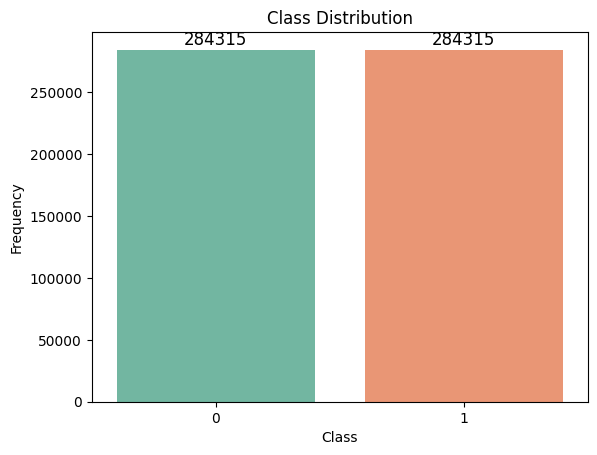

<Figure size 100x100 with 0 Axes>

In [169]:
plot_class_distribution(y_resample, 'Class', figsize=(1, 1))

In [171]:
X_train_resample = np.array(X_train_resample)
X_test_resample = np.array(X_test_resample)
y_train_resample = np.array(y_train_resample)
y_test_resample = np.array(y_test_resample)

In [173]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

C:\Users\amine\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [177]:
from imblearn.pipeline import Pipeline as ImbPipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', nn_classifier)
])


In [179]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv, cv=skf)
results_cv.append({
    "Model": "OverSampled Neural Network",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

Epoch 1/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8715 - loss: 0.5271
Epoch 2/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accuracy: 0.9687 - loss: 0.0694
Epoch 3/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accuracy: 0.9790 - loss: 0.0533
Epoch 4/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - accuracy: 0.9856 - loss: 0.0406
Epoch 5/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9879 - loss: 0.0366
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 707us/step
Epoch 1/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.8678 - loss: 0.5054
Epoch 2/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9648 - loss: 0.0788
Epoch 3/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.9732 - loss: 0.0664
Epoch 4/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.9766 - loss: 0.0613
Epoch 5/5
21229/21229 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - accuracy: 0.9780 - loss: 0.0578
2659/2659 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step
Epoch 1/5


In [199]:
model.fit(X_train_resample,y_train_resample,batch_size=15,epochs=5)

Epoch 1/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.9699 - loss: 0.0735
Epoch 2/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9964 - loss: 0.0137
Epoch 3/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9971 - loss: 0.0110
Epoch 4/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9978 - loss: 0.0095
Epoch 5/5
26536/26536 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9983 - loss: 0.0078


5331/5331 ━━━━━━━━━━━━━━━━━━━━ 4s 741us/step
Confusion matrix, without normalization
[[85102   194]
 [10997 74299]]


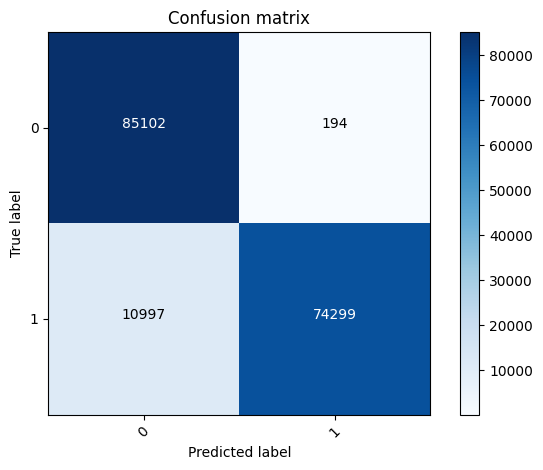

In [200]:
y_pred_oversampling = model.predict(X_test_resample)
y_expected_oversampling = pd.DataFrame(y_test_resample)
cnf_matrix = confusion_matrix(y_expected_oversampling, y_pred_oversampling.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [220]:
acc = accuracy_score(y_test_resample, y_pred_oversampling.round())
prec = precision_score(y_test_resample, y_pred_oversampling.round())
rec = recall_score(y_test_resample, y_pred_oversampling.round())
f1 = f1_score(y_test_resample, y_pred_oversampling.round())

In [222]:
# Create the new DataFrame with the model results
model_result = pd.DataFrame([['OverSampledNN (OverSampled testing data)', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545
5,UnderSampledNN (Normal testing data),0.999391,0.204082,0.795918,0.841727,0.818182
6,OverSampledNN (OverSampled testing data),0.934399,0.128927,0.871073,0.997396,0.929964


All metrics are excellent for this last model.

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 715us/step
Confusion matrix, without normalization
[[85102   194]
 [   21   126]]


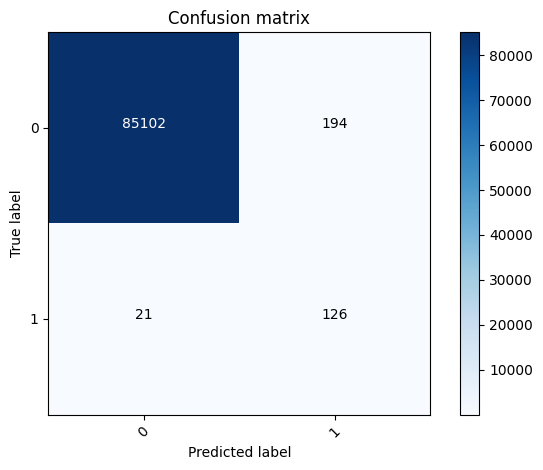

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545
5,UnderSampledNN (Normal testing data),0.999391,0.204082,0.795918,0.841727,0.818182
6,OverSampledNN (OverSampled testing data),0.934399,0.128927,0.871073,0.997396,0.929964
7,OverSampledNN (Normal testing data),0.997484,0.142857,0.857143,0.393750,0.539615


In [225]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Create the new DataFrame with the model results
model_result = pd.DataFrame([['OverSampledNN (Normal testing data)', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset


- Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.
- Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement

## GAMs

In [228]:
from pygam import LogisticGAM,s,l
gam = LogisticGAM(s(0)+s(1)+s(2) + s(3)+ s(4)+ s(5)+ s(6)+ s(7)
                  + s(8)+ l(9)+ s(10)+ l(11)+ s(12)+ l(13)+ s(14)
                  + s(15)+ s(16)+ l(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)
                  + s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28))

Gam 1 = uses all splines except for v10, v12, v14 and v18 which we used as linear since they all have a corelation higher than 0.2

In [230]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gam)
])

In [231]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv, cv=skf)
results_cv.append({
    "Model": "Gam with spline + linear",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

In [232]:
gam.fit(X_train, y_train)

C:\Users\amine\anaconda3\Lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
C:\Users\amine\anaconda3\Lib\site-packages\pygam\pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + l(9) + s(10) + l(11) + s(12) + l(13) + s(14) + s(15) + s(16) + l(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + intercept,
   tol=0.0001, verbose=False)

In [233]:
gam.accuracy(X_test, y_test)

0.9995084442259752

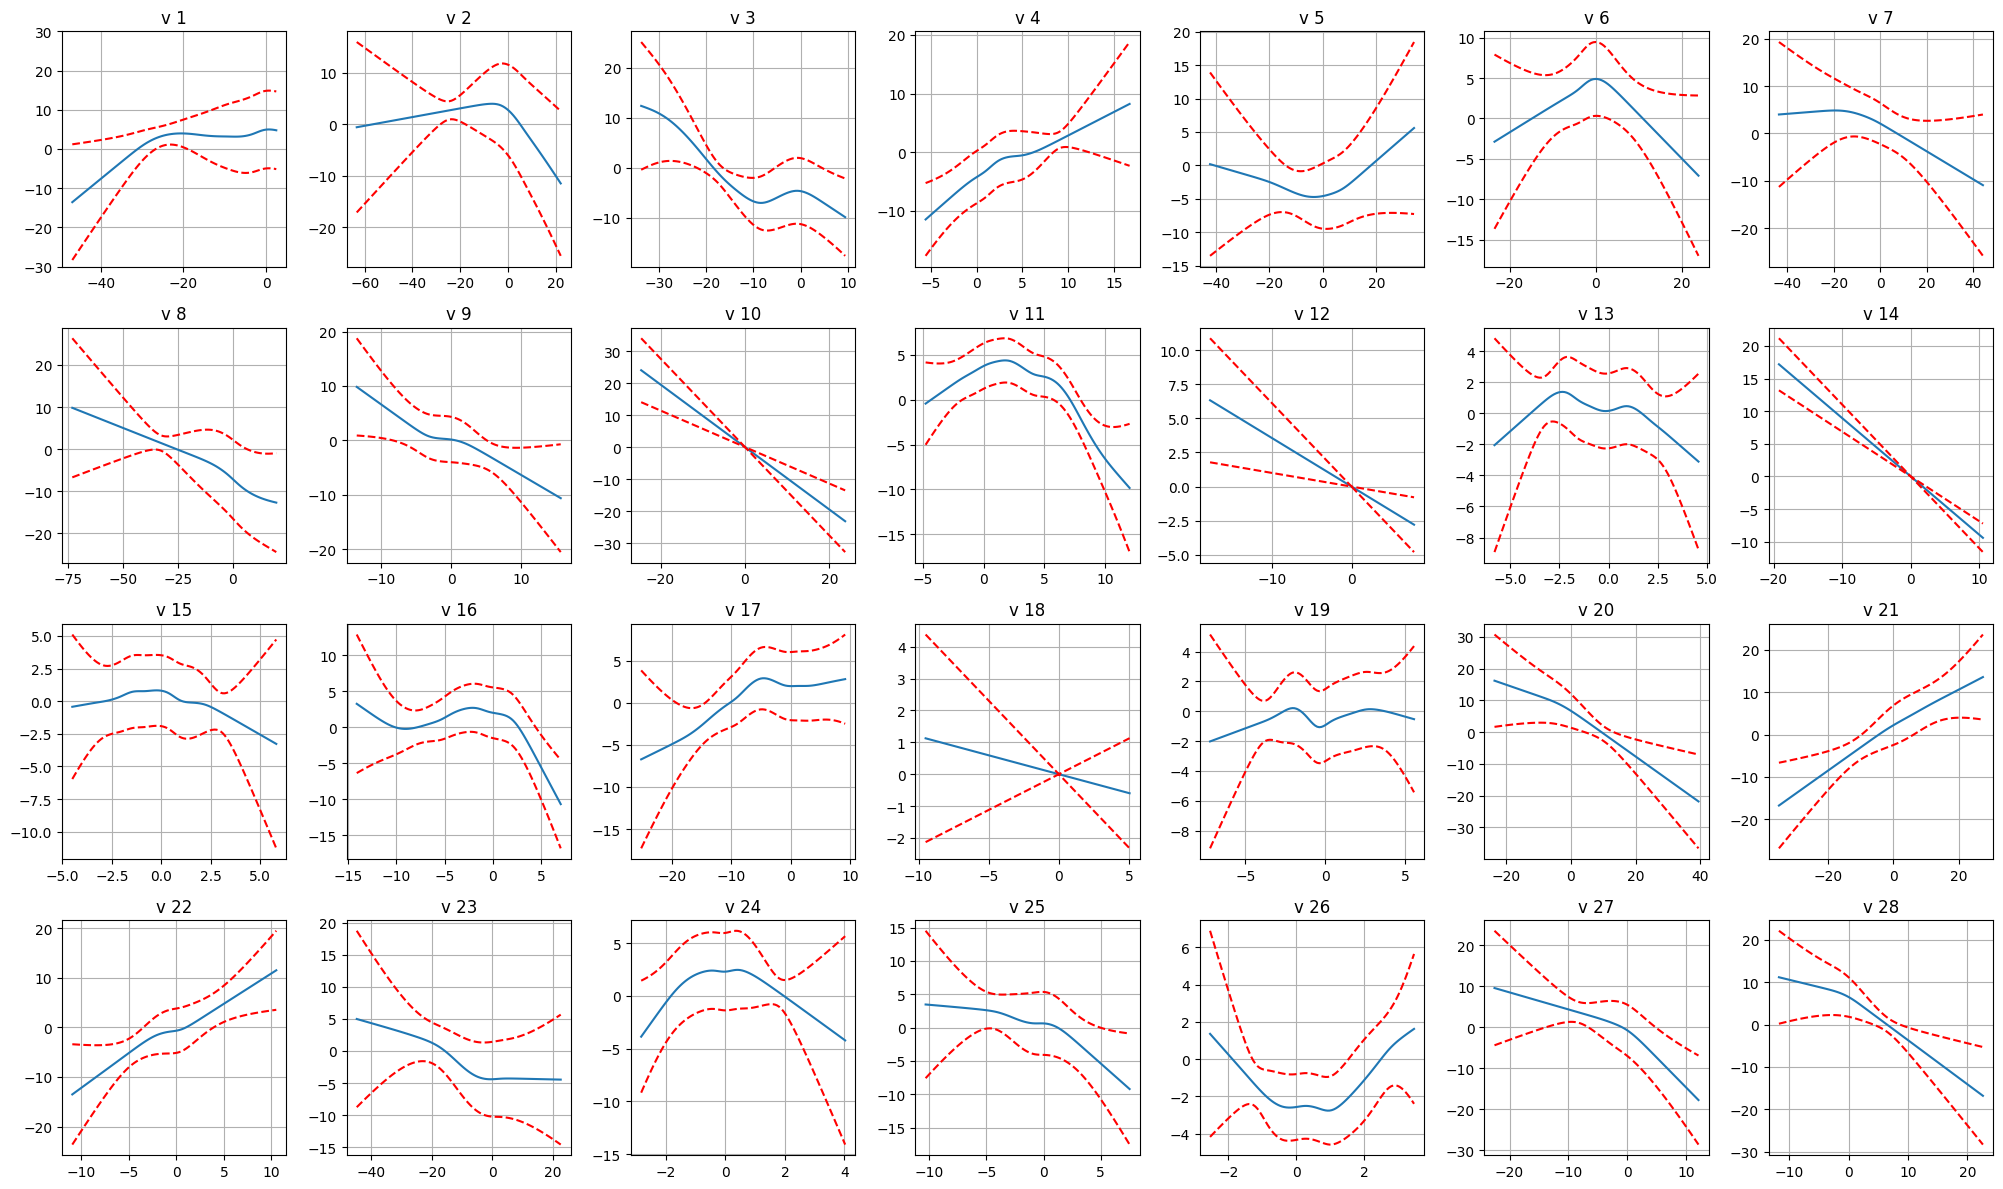

In [234]:
fig, axs = plt.subplots(4, 7, figsize=(20, 12)) 

for i, ax in enumerate(axs.flat):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(f'v {i+1}')
    ax.grid()


plt.tight_layout()
plt.show()

In [235]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     83.5267
Link Function:                        LogitLink Log Likelihood:                                  -455.7143
Number of Samples:                       199364 AIC:                                             1078.4818
                                                AICc:                                            1078.5544
                                                UBRE:                                               2.0057
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8205
Feature Function                  Lam

C:\Users\amine\AppData\Local\Temp\ipykernel_24992\3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


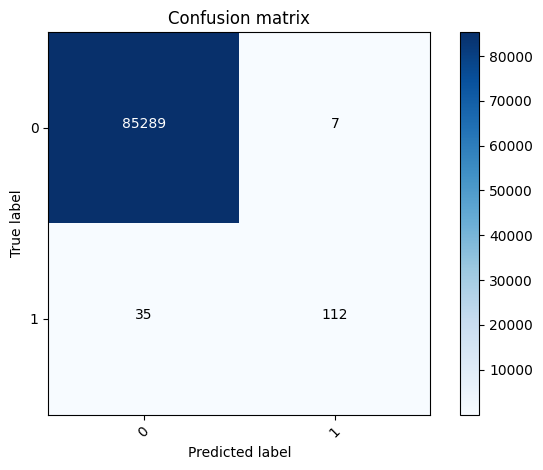

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545
5,UnderSampledNN (Normal testing data),0.999391,0.204082,0.795918,0.841727,0.818182
6,OverSampledNN (OverSampled testing data),0.934399,0.128927,0.871073,0.997396,0.929964
7,OverSampledNN (Normal testing data),0.997484,0.142857,0.857143,0.393750,0.539615
8,Gam with spline + linear,0.999508,0.238095,0.761905,0.941176,0.842105


In [236]:
y_pred = gam.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Create the new DataFrame with the model results
model_result = pd.DataFrame([['Gam with spline + linear', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

In [237]:
gam2 = LogisticGAM(s(0)+s(1)+s(2) + s(3)+ s(4)+ s(5)+ s(6)+ s(7)
                  + s(8)+ s(9)+ s(10)+ s(11)+ s(12)+ s(13)+ s(14)
                  + s(15)+ s(16)+ s(17)+ s(18)+ s(19)+ s(20)+ s(21)+ s(22)
                  + s(23)+ s(24)+ s(25)+ s(26)+ s(27)+ s(28))

Gam 2 = uses all splines

In [242]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gam2)
])

In [243]:
cv_scores = cross_val_score(pipeline, X_train_cv, y_train_cv, cv=skf)
results_cv.append({
    "Model": "Gams with all splines",
    "Mean Accuracy": cv_scores.mean(),
    "Std Deviation": cv_scores.std(),
    "CV Scores": [round(score, 3) for score in cv_scores]  # Store individual scores for reference
})

In [244]:
gam2.fit(X_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + s(26) + s(27) + s(28) + intercept,
   tol=0.0001, verbose=False)

In [245]:
gam2.accuracy(X_test, y_test)

0.9995084442259752

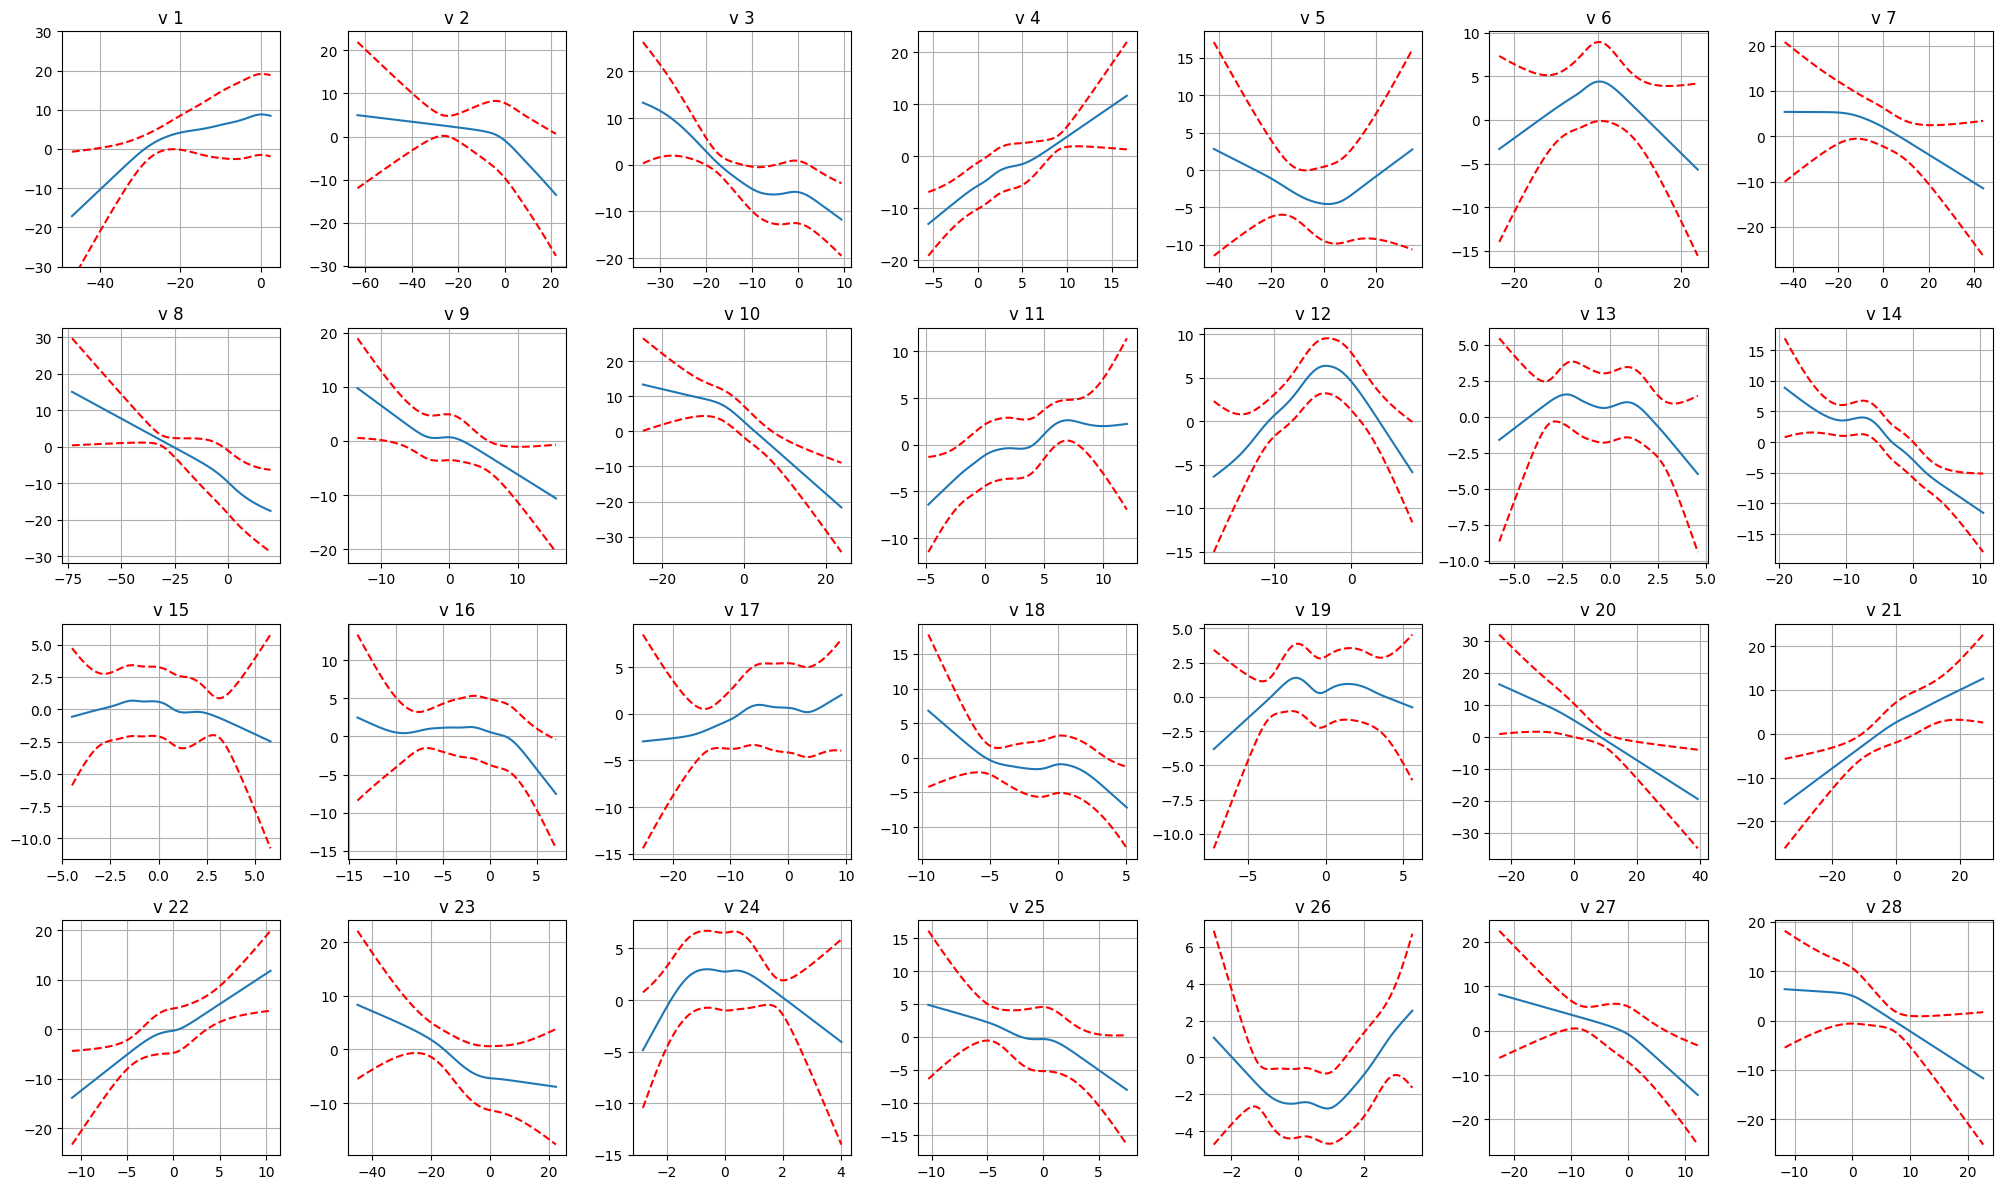

In [246]:
fig, axs = plt.subplots(4, 7, figsize=(20, 12))  # 4 rows, 7 columns

for i, ax in enumerate(axs.flat):
    XX = gam2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(f'v {i+1}')
    ax.grid()


plt.tight_layout()
plt.show()

In [247]:
gam2.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     92.9538
Link Function:                        LogitLink Log Likelihood:                                  -418.8454
Number of Samples:                       199364 AIC:                                             1023.5984
                                                AICc:                                            1023.6879
                                                UBRE:                                               2.0055
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.835
Feature Function                  Lam

C:\Users\amine\AppData\Local\Temp\ipykernel_24992\263715579.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


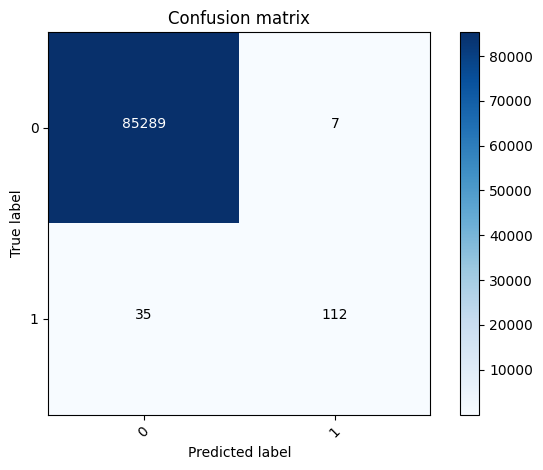

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999520,0.238095,0.761905,0.949153,0.845283
1,DecisionTree,0.999309,0.238095,0.761905,0.823529,0.791519
2,PlainNeuralNetwork,0.999403,0.183673,0.816327,0.833333,0.824742
3,WeightedNeuralNetwork,0.989057,0.108844,0.891156,0.124762,0.218881
4,UnderSampledNN (UnderSampled test data),0.902027,0.190789,0.809211,1.000000,0.894545
5,UnderSampledNN (Normal testing data),0.999391,0.204082,0.795918,0.841727,0.818182
6,OverSampledNN (OverSampled testing data),0.934399,0.128927,0.871073,0.997396,0.929964
7,OverSampledNN (Normal testing data),0.997484,0.142857,0.857143,0.393750,0.539615
8,Gam with spline + linear,0.999508,0.238095,0.761905,0.941176,0.842105
9,Gam with all spline,0.999508,0.238095,0.761905,0.941176,0.842105


In [249]:
y_pred = gam.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

# Create the new DataFrame with the model results
model_result = pd.DataFrame([['Gam with all spline', acc, 1-rec, rec, prec, f1]],
                            columns=columns)

results_testset = pd.concat([results_testset, model_result], ignore_index=True)

results_testset

In [250]:
results_cv_df = pd.DataFrame(results_cv)
print(results_cv_df)

                         Model  Mean Accuracy  Std Deviation  \
0                Random Forest       0.999539   3.753671e-05   
1               Decision trees       0.999102   8.302728e-05   
2               Neural Network       0.999378   1.114818e-04   
3      Weighted Neural Network       0.979424   1.148919e-02   
4  Undersampled Neural Network       0.494192   1.762036e-03   
5   OverSampled Neural Network       0.977278   4.560921e-03   
6     Gam with spline + linear       0.998269   1.736050e-08   
7        Gams with all splines       0.998269   1.736050e-08   

                             CV Scores  
0          [0.999, 1.0, 1.0, 1.0, 1.0]  
1  [0.999, 0.999, 0.999, 0.999, 0.999]  
2  [0.999, 0.999, 0.999, 0.999, 0.999]  
3  [0.978, 0.985, 0.983, 0.993, 0.959]  
4  [0.493, 0.493, 0.493, 0.496, 0.496]  
5  [0.986, 0.978, 0.977, 0.974, 0.972]  
6  [0.998, 0.998, 0.998, 0.998, 0.998]  
7  [0.998, 0.998, 0.998, 0.998, 0.998]  
